In [31]:
import matplotlib.pyplot as plt

In [32]:
# Creating graph for average episode rewards when training on single MDP

filenames = {
  "Dueling-DDQN": "./results/dueling_ddqn_single_mdp_train.json",
  "Natural Grad": "./results/natural_gradient_update_single_mdp_train.json",
  "Linear QL": "./results/q_learning_single_mdp_train.json",
  "Restricted Policy Update": "./results/restricted_policy_update_single_mdp_train.json",
  "TRPO": "./results/trpo_single_mdp_train.json",
  "Actor-Critic": "./results/actor_critic_single_mdp_train.json",
}

In [33]:
# Read in jsons
import json

train_rewards = {}
for name, filename in filenames.items():
  with open(filename, "r") as f:
    train_rewards[name] = json.load(f)["train_rewards"]

In [34]:
# Restrict linear dqn to 300 epochs
train_rewards["Linear QL"] = train_rewards["Linear QL"][:350]

In [35]:
# Smooth rewards
import numpy as np

smoothed_train_rewards = {}
for name, rewards in train_rewards.items():
  smoothed_train_rewards[name] = np.convolve(rewards, np.ones((10,))/10, mode='valid')

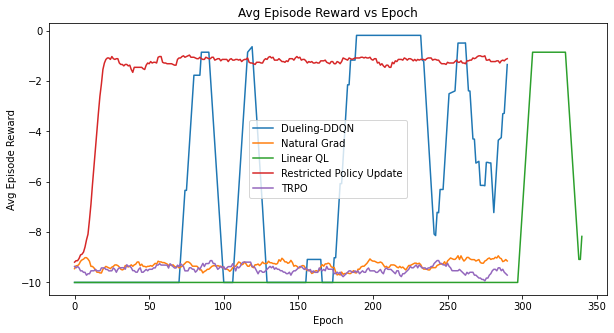

In [36]:
# Graph rewards

plt.figure(figsize=(10, 5))
for name, rewards in smoothed_train_rewards.items():
  plt.plot(rewards, label=name)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Avg Episode Reward")
plt.title("Avg Episode Reward vs Epoch")
plt.show()

In [37]:
# Print out same_mdp_eval_rewards, train_mdp_eval_rewards, test_mdp_eval_rewards

In [38]:
for name, filename in filenames.items():
  with open(filename, "r") as f:
    data = json.load(f)
    print(name)
    print("Same MDP Eval Reward: {}".format(np.mean(data["same_mdp_eval_rewards"])))
    print("Train MDP Eval Reward: {}".format(np.mean(data["train_mdp_eval_rewards"])))
    print("Test MDP Eval Reward: {}".format(np.mean(data["test_mdp_eval_rewards"])))
    print()

Dueling-DDQN
Same MDP Eval Reward: -0.17379979705979992
Train MDP Eval Reward: -0.6419252283546991
Test MDP Eval Reward: -0.589840148125257

Natural Grad
Same MDP Eval Reward: -0.1578917934330974
Train MDP Eval Reward: -0.4637350303396444
Test MDP Eval Reward: -0.46511984907229315

Linear QL
Same MDP Eval Reward: -0.8490901733027204
Train MDP Eval Reward: -0.5318537603546653
Test MDP Eval Reward: -0.45467483205719217

Restricted Policy Update
Same MDP Eval Reward: -0.8490901733027204
Train MDP Eval Reward: -0.5318537603546653
Test MDP Eval Reward: -0.45467483205719217

TRPO
Same MDP Eval Reward: -10.0
Train MDP Eval Reward: -9.815066848841111
Test MDP Eval Reward: -9.627806409887413

